### Imports and prelims

In [1]:
from credentials import user, password, server
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sb

In [2]:
engine = create_engine("postgres+psycopg2://"+user+":"+password+"@"+server+":5432/covid_data")

In [3]:
colleges_df = pd.read_sql("SELECT * FROM colleges;", con=engine)
counties_df = pd.read_sql("SELECT * FROM counties;", con=engine)
mask_use_df = pd.read_sql("SELECT * FROM mask_use;", con=engine)
states_df = pd.read_sql("SELECT * FROM states;", con=engine)
us_totals_df = pd.read_sql("SELECT * FROM us_totals;", con=engine)

In [4]:
businesses_df = pd.read_csv('../data/businesses.csv')

In [5]:
clusters_df = pd.read_csv('../data/clusters.csv')

In [6]:
hub_nash_df = pd.read_csv('../data/hubNashville__311__Service_Requests.csv', low_memory=False)

In [7]:
clusters_df

,Cluster Name,Facility Type,Cluster Start Date,# Cases,Latitude,Longitude
0,Vanderbilt Parties,Social Gathering,3/11/2020,49,36.144703,-86.802655
1,Event at Clementine Hall,Social Gathering,3/14/2020,23,36.152444,-86.844583
2,Religious Retreat,Social Gathering,3/25/2020,18,NaN,NaN
3,The Health Center at Richland Place,LTCF,4/3/2020,47,36.128750,-86.817345
4,Trevecca Center for Rehab and Healing,LTCF,4/4/2020,102,36.144562,-86.754560
...,...,...,...,...,...,...
57,One Stone Church Service,Church,9/22/2020,10,36.189960,-86.765149
58,Miss Kelli's,Bar,10/1/2020,14,36.164369,-86.778515
59,Nashville Rescue Mission - Women's Campus,Congregate Living,10/1/2020,70,36.153700,-86.777276
60,Link Systems Electric,Other,10/16/2020,12,36.092924,-86.741684


In [8]:
hub_nash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486496 entries, 0 to 486495
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Request #                   486496 non-null  int64  
 1   Status                      486496 non-null  object 
 2   Request Type                486164 non-null  object 
 3   Subrequest Type             483005 non-null  object 
 4   Additional Subrequest Type  482625 non-null  object 
 5   Date / Time Opened          486496 non-null  object 
 6   Date / Time Closed          475795 non-null  object 
 7   Request Origin              486496 non-null  object 
 8   System of Origin ID         29269 non-null   object 
 9   Contact Type                27479 non-null   object 
 10  Preferred Language          0 non-null       float64
 11  State Issue                 486496 non-null  bool   
 12  Parent Request              5183 non-null    float64
 13  Closed When Cr

In [9]:
.to_datetime()

SyntaxError: invalid syntax (<ipython-input-9-ef55ac71c06d>, line 1)

### Question 3

In [11]:
counties_T = counties_df[counties_df['state'] == 'Tennessee'].drop_duplicates(subset=['county'])
counties_T = counties_T['fips']

In [12]:
### Davidson county = 47037 fips
mask_use_Tenn = mask_use_df[mask_use_df['county_fips'].isin(counties_T)]
desc_ten = mask_use_Tenn[['never', 'rarely', 'sometimes', 'frequently', 'always']].describe()
david_mask = mask_use_df[mask_use_df['county_fips'] == '47037']

In [13]:
desc_ten = desc_ten.append(david_mask)

In [14]:
desc_county = mask_use_df[['never', 'rarely', 'sometimes', 'frequently', 'always']].describe()
desc_county = desc_county.append(david_mask)
desc_county

,never,rarely,sometimes,frequently,always,county_fips
count,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,NaN
mean,0.079940,0.082919,0.121318,0.207725,0.508094,NaN
std,0.058538,0.055464,0.058011,0.063571,0.152191,NaN
min,0.000000,0.000000,0.001000,0.029000,0.115000,NaN
25%,0.034000,0.040000,0.079000,0.164000,0.393250,NaN
50%,0.068000,0.073000,0.115000,0.204000,0.497000,NaN
75%,0.113000,0.115000,0.156000,0.247000,0.613750,NaN
max,0.432000,0.384000,0.422000,0.549000,0.889000,NaN
2446,0.020000,0.037000,0.086000,0.181000,0.677000,47037


In [19]:
desc_county.to_csv(path_or_buf='../Notebooks/desc_county.csv', index=False)

In [21]:
desc_ten.to_csv(path_or_buf='../Notebooks/desc_ten.csv', index=False)

### Graphitbruh

In [25]:
desc_ten = desc_ten.iloc[[1,3,4,5,6,7,8], 0:]
tn_always = desc_ten['always'].tolist()

In [22]:
desc_ten

,never,rarely,sometimes,frequently,always,county_fips
count,95.000000,95.000000,95.000000,95.000000,95.000000,NaN
mean,0.110042,0.101358,0.151958,0.209526,0.427189,NaN
std,0.046025,0.044597,0.048683,0.057255,0.087844,NaN
min,0.018000,0.001000,0.033000,0.083000,0.249000,NaN
25%,0.080500,0.071000,0.118000,0.173500,0.365000,NaN
50%,0.108000,0.093000,0.150000,0.212000,0.411000,NaN
75%,0.142000,0.129000,0.188000,0.240500,0.480000,NaN
max,0.219000,0.243000,0.264000,0.362000,0.682000,NaN
2446,0.020000,0.037000,0.086000,0.181000,0.677000,47037


[Text(0, 0.5, 'Percents'),
 Text(0.5, 0, 'Descriptors'),
 Text(0.5, 1.0, 'When compared to the descriptive metrics of "Always" mask users in TN, we see that Davidson is doing quite well')]

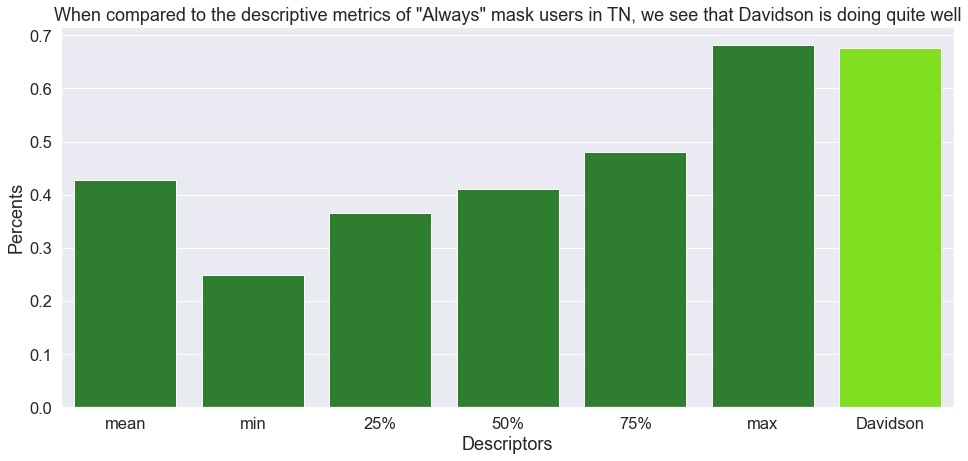

In [41]:
x = ['mean', 'min', '25%', '50%', '75%', 'max', 'Davidson']
txpos = [i for i, _ in enumerate(x)]
sb.set_style('darkgrid')
sb.set(font_scale=1.5)
fig,tax=plt.subplots(figsize=(16,7))
tax = sb.barplot(x, tn_always, palette=['ForestGreen', 'ForestGreen', 'ForestGreen', 'ForestGreen', 'ForestGreen', 'ForestGreen', 'Chartreuse'])
tax.set(xlabel = 'Descriptors', ylabel = 'Percents', title = 'When compared to the descriptive metrics of "Always" mask users in TN, we see that Davidson is doing quite well')

In [27]:
tn_never = desc_ten['never'].tolist()

[Text(0, 0.5, 'Percents'),
 Text(0.5, 0, 'Descriptors'),
 Text(0.5, 1.0, 'When taking the "Never" metrics of the same, we see that we are still doing well comparatively')]

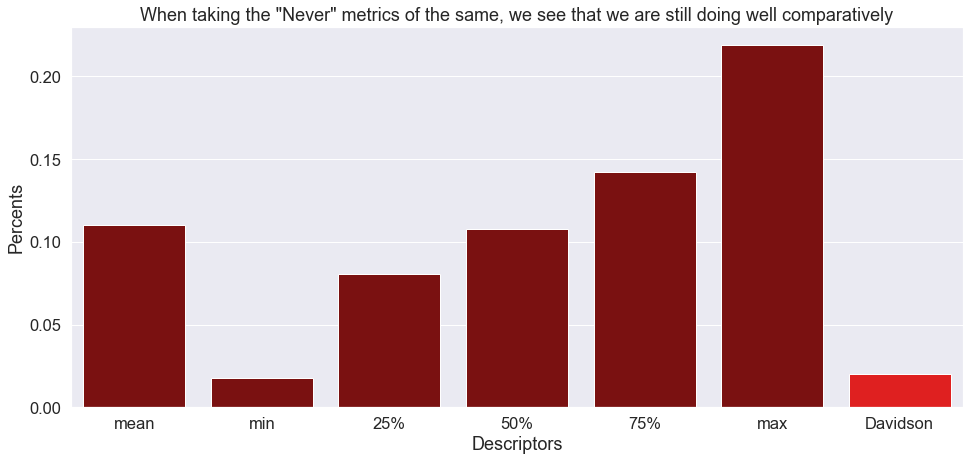

In [38]:
fig,tnx=plt.subplots(figsize=(16,7))
tnx = sb.barplot(x, tn_never, palette=['DarkRed', 'DarkRed', 'DarkRed', 'DarkRed', 'DarkRed', 'DarkRed', 'Red'])
tnx.set(xlabel = 'Descriptors', ylabel = 'Percents', title = 'When taking the "Never" metrics of the same, we see that we are still doing well comparatively')

In [29]:
desc_county = desc_county.iloc[[1,3,4,5,6,7,8], 0:]
county_always = desc_county['always'].tolist()

[Text(0, 0.5, 'Percents'),
 Text(0.5, 0, 'Descriptors'),
 Text(0.5, 1.0, 'Davidson is in the top 25% of national "Always" mask wearers')]

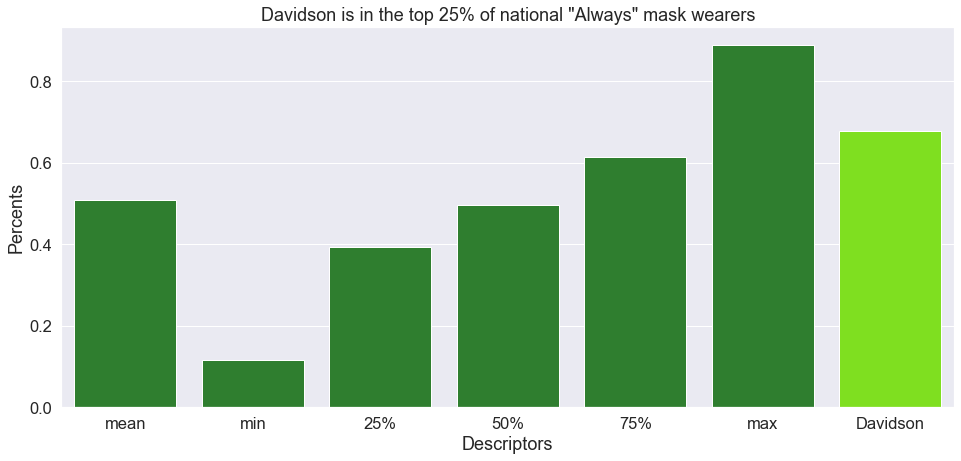

In [40]:
fig,cax=plt.subplots(figsize=(16,7))
sb.set(font_scale=1.5)
cax = sb.barplot(x, county_always, palette=['ForestGreen', 'ForestGreen', 'ForestGreen', 'ForestGreen', 'ForestGreen', 'ForestGreen', 'Chartreuse'])
cax.set(xlabel = 'Descriptors', ylabel = 'Percents', title = 'Davidson is in the top 25% of national "Always" mask wearers')

In [31]:
county_never = desc_county['never'].tolist()

[Text(0, 0.5, 'Percents'),
 Text(0.5, 0, 'Descriptors'),
 Text(0.5, 1.0, 'Again, while the national averages of those who never wear their masks are thankfully low, we are in the lower end of the 25% percentile')]

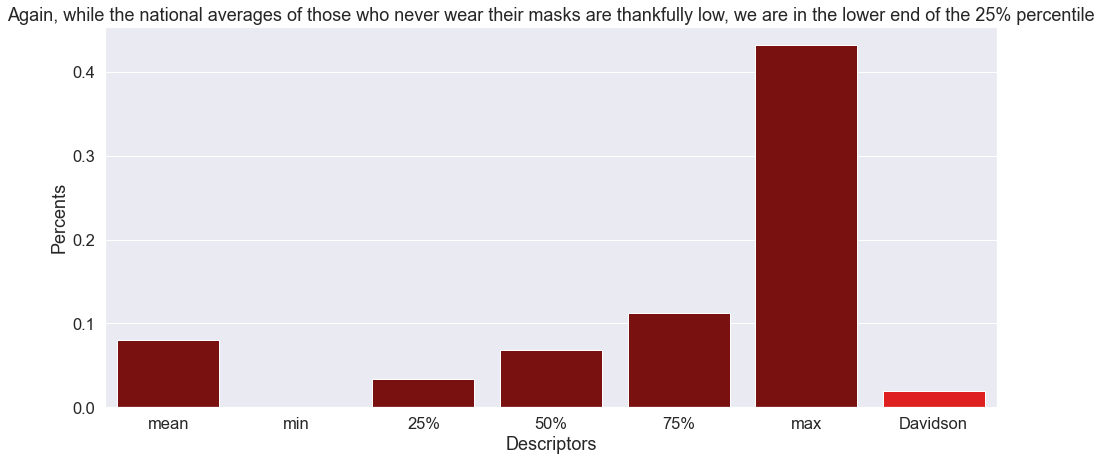

In [39]:
fig,cnx=plt.subplots(figsize=(16,7))
sb.set(font_scale=1.5)
cnx = sb.barplot(x, county_never, palette=['DarkRed', 'DarkRed', 'DarkRed', 'DarkRed', 'DarkRed', 'DarkRed', 'Red'])
cnx.set(xlabel = 'Descriptors', ylabel = 'Percents', title = "Again, while the national averages of those who never wear their masks are thankfully low, we are in the lower end of the 25% percentile")

### Question 5

In [33]:
cluster_type = clusters_df.groupby('Facility Type', sort=True)['# Cases'].sum().reset_index()
cluster_type = cluster_type.sort_values('# Cases', ascending=False)
cluster_type = cluster_type.replace(to_replace='LTCF', value='Long Term Care Facility')

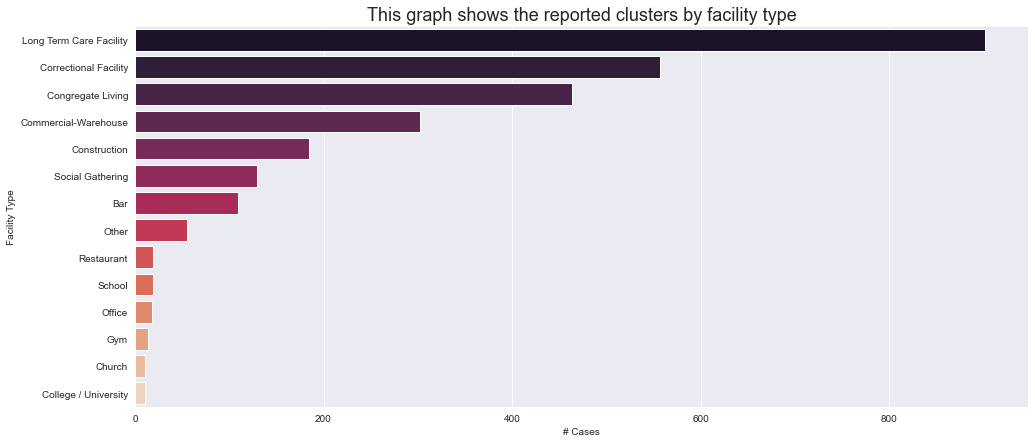

In [34]:
fig,ax=plt.subplots(figsize=(16,7))
sb.set(font_scale=1.5)
ax.set(title = 'This graph shows the reported clusters by facility type')
sb.barplot(x=cluster_type['# Cases'], y=cluster_type['Facility Type'], orient='h', palette='rocket')

In [ ]:
# pretty sure we were all aware that long term care and correctional facilities were good places to get sick,
# but I was personally surprised at construction. Mask up, yall.